<a href="https://www.kaggle.com/code/vaibhavbawej07/multi-class-prediction-obesity-90-accuracy?scriptVersionId=162448673" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Columns of the data explained!

* id: An identifier for each individual.
* Gender: The gender of the person (Male/Female).
* Age: The age of the person.
* Height: The height of the person.
* Weight: The weight of the person.
* family_history_with_overweight: Whether the person has a family history of overweight (yes/no).
* FAVC: Frequent consumption of high-caloric food (yes/no).
* FCVC: Frequency of consumption of vegetables.
* NCP: Number of main meals per day.
* CAEC: Consumption of food between meals.
* SMOKE: Whether the person smokes (yes/no).
* CH2O: Daily water consumption.
* SCC: Calories consumption monitoring (yes/no).
* FAF: Physical activity frequency.
* TUE: Time using technology devices.
* CALC: Consumption of alcohol.
* MTRANS: Mode of transportation.
* NObeyesdad: Obesity level based on the World Health Organization (WHO) classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
import datetime as dt

from math import ceil
from tqdm import tqdm

from sklearn.base import is_classifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier


from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [3]:
 
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

# EDA

In [4]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [5]:
train.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


summary_statistics = train[numerical_columns].agg(['mean', 'median', 'std']).transpose()


print(summary_statistics)

             mean     median        std
Age     23.841804  22.815416   5.688072
Height   1.700245   1.700000   0.087312
Weight  87.887768  84.064875  26.379443
FCVC     2.445908   2.393837   0.533218
NCP      2.761332   3.000000   0.705375
CH2O     2.029418   2.000000   0.608467
FAF      0.981747   1.000000   0.838302
TUE      0.616756   0.573887   0.602113


In [11]:
train['Gender'].value_counts(ascending=True)

Gender
Male      10336
Female    10422
Name: count, dtype: int64

In [12]:
train['family_history_with_overweight'].value_counts(ascending = True)

family_history_with_overweight
no      3744
yes    17014
Name: count, dtype: int64

In [13]:
train['NObeyesdad'].value_counts(ascending=True)

NObeyesdad
Overweight_Level_I     2427
Overweight_Level_II    2522
Insufficient_Weight    2523
Obesity_Type_I         2910
Normal_Weight          3082
Obesity_Type_II        3248
Obesity_Type_III       4046
Name: count, dtype: int64

# Vizualization 

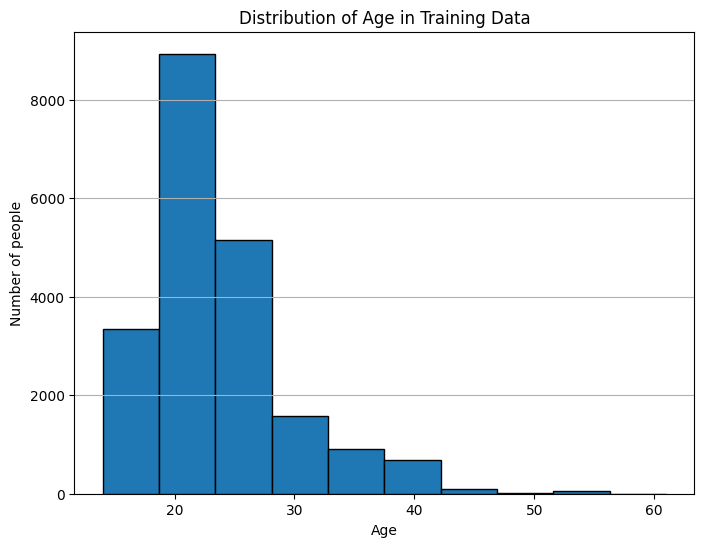

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(train['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of Age in Training Data')
plt.grid(axis='y')
plt.show()

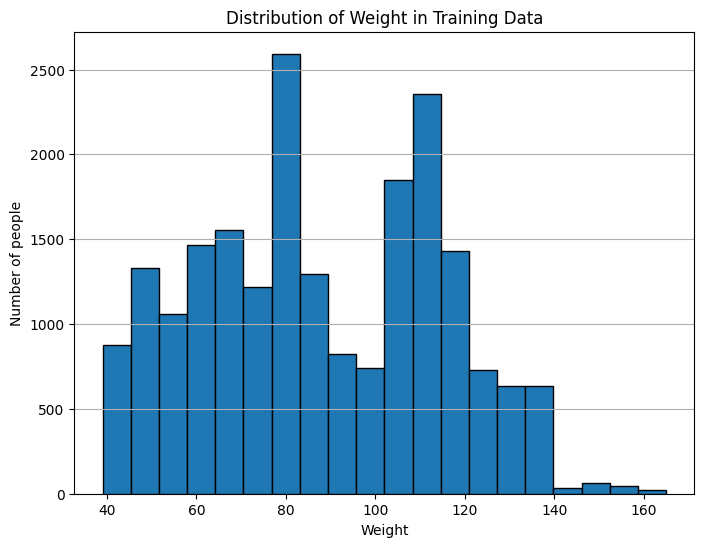

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(train['Weight'], bins=20, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Number of people')
plt.title('Distribution of Weight in Training Data')
plt.grid(axis='y')
plt.show()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


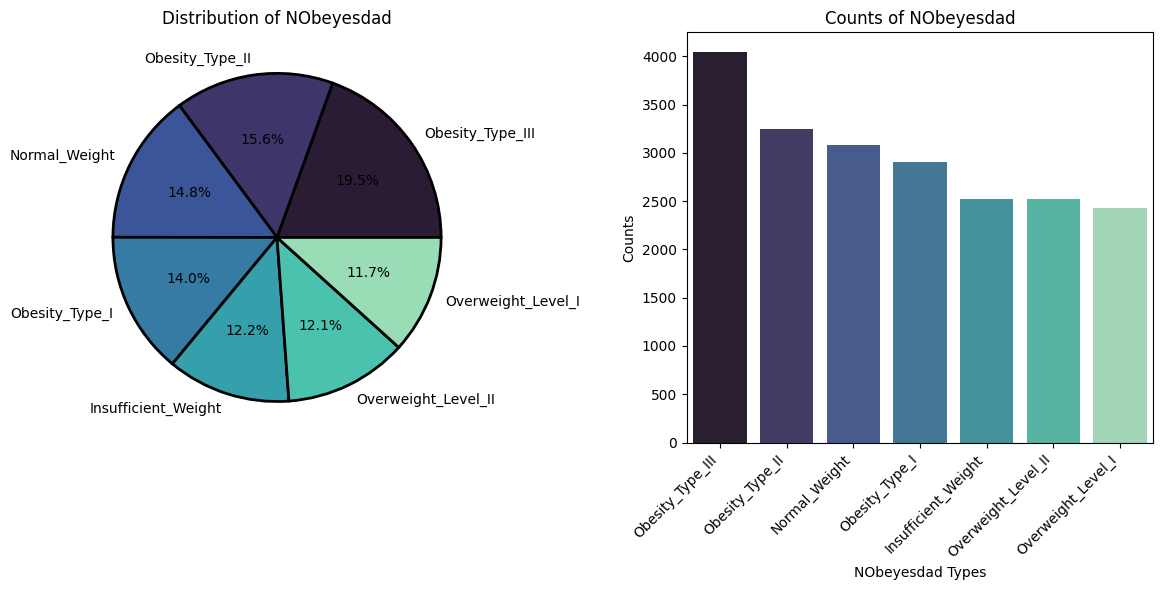

In [16]:
value_counts = train['NObeyesdad'].value_counts()

palette_color = sns.color_palette("mako", n_colors=value_counts.size)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=palette_color, 
           wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs[0].set_title('Distribution of NObeyesdad')

sns.barplot(x=value_counts.index, y=value_counts.values, palette="mako", ax=axs[1])
axs[1].set_title('Counts of NObeyesdad')
axs[1].set_ylabel('Counts')
axs[1].set_xlabel('NObeyesdad Types')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")
print(value_counts)
plt.tight_layout()
plt.show()

Gender
Female    10422
Male      10336
Name: count, dtype: int64


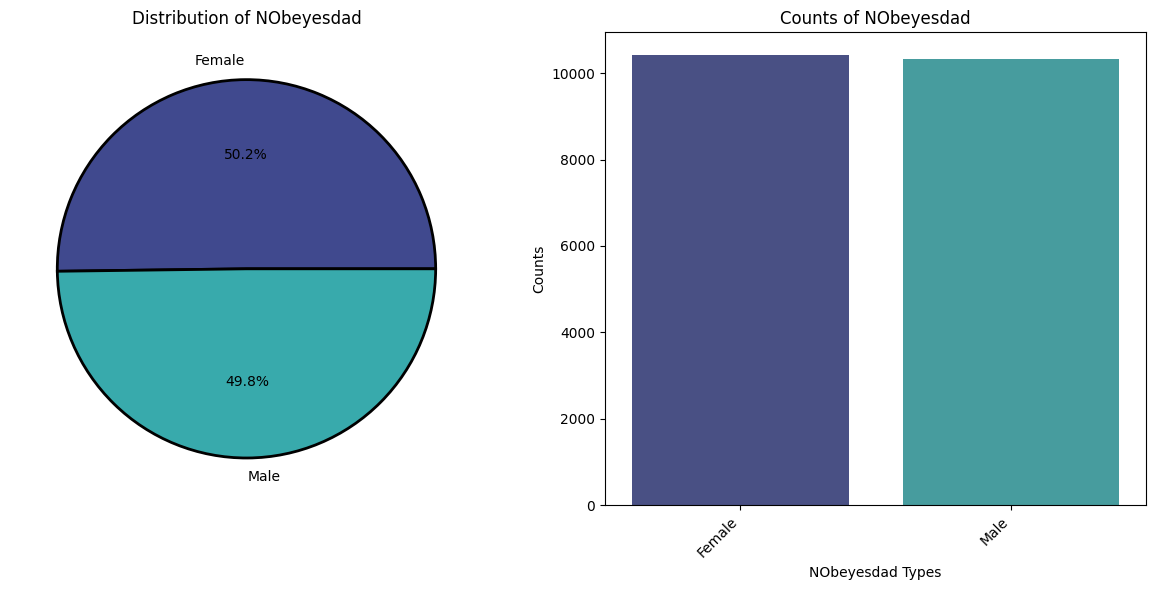

In [17]:
value_counts = train['Gender'].value_counts()

palette_color = sns.color_palette("mako", n_colors=value_counts.size)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=palette_color, 
           wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs[0].set_title('Distribution of NObeyesdad')

sns.barplot(x=value_counts.index, y=value_counts.values, palette="mako", ax=axs[1])
axs[1].set_title('Counts of NObeyesdad')
axs[1].set_ylabel('Counts')
axs[1].set_xlabel('NObeyesdad Types')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")

print(value_counts)
plt.tight_layout()
plt.show()

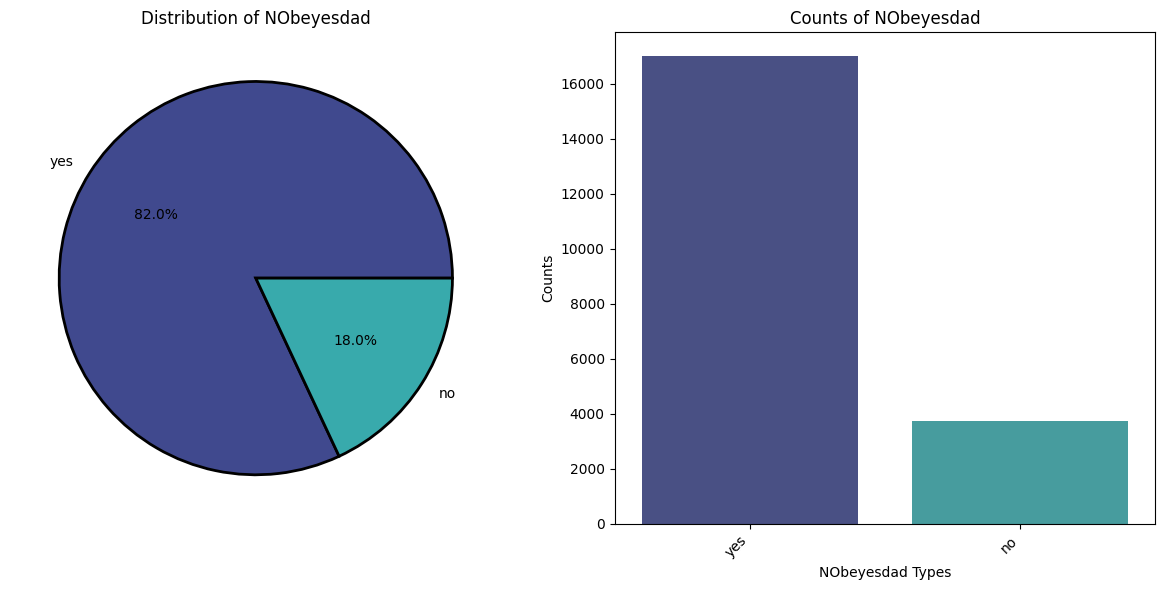

In [18]:
value_counts = train['family_history_with_overweight'].value_counts()

palette_color = sns.color_palette("mako", n_colors=value_counts.size)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=palette_color, 
           wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs[0].set_title('Distribution of NObeyesdad')

sns.barplot(x=value_counts.index, y=value_counts.values, palette="mako", ax=axs[1])
axs[1].set_title('Counts of NObeyesdad')
axs[1].set_ylabel('Counts')
axs[1].set_xlabel('NObeyesdad Types')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Feature Selection

In [19]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [20]:
t_df = train[train.columns]

In [21]:
t_df.drop('NObeyesdad', axis=1)

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS  
0      Public_Transportation  
1                 Automobile  
2      Public_Transportation  
3      Public_Transportation  
4      Public_Transportation  
...                      ...  
20753  Public_Transportation  
20754  Public_Transportation  
20755  Public_Transportation  
20756             Automobile  
20757  Public_Transportation  

[20758 rows x 17 columns]

In [22]:
labelencoder = LabelEncoder()
for col in t_df.columns:
    if t_df[col].dtypes == 'object':
        t_df.loc[:, col] = labelencoder.fit_transform(t_df[col])

In [23]:
t_df.head()

id Gender        Age    Height      Weight family_history_with_overweight  \
0   0      1  24.443011  1.699998   81.669950                              1   
1   1      0  18.000000  1.560000   57.000000                              1   
2   2      0  18.000000  1.711460   50.165754                              1   
3   3      0  20.952737  1.710730  131.274851                              1   
4   4      1  31.641081  1.914186   93.798055                              1   

  FAVC      FCVC       NCP CAEC SMOKE      CH2O SCC       FAF       TUE CALC  \
0    1  2.000000  2.983297    2     0  2.763573   0  0.000000  0.976473    1   
1    1  2.000000  3.000000    1     0  2.000000   0  1.000000  1.000000    2   
2    1  1.880534  1.411685    2     0  1.910378   0  0.866045  1.673584    2   
3    1  3.000000  3.000000    2     0  1.674061   0  1.467863  0.780199    1   
4    1  2.679664  1.971472    2     0  1.979848   0  1.967973  0.931721    1   

  MTRANS NObeyesdad  
0      3          6  
1      0          1  
2      3          0  
3      3          4  
4      3          6

In [24]:
t_df[:10].style.background_gradient(cmap='crest')

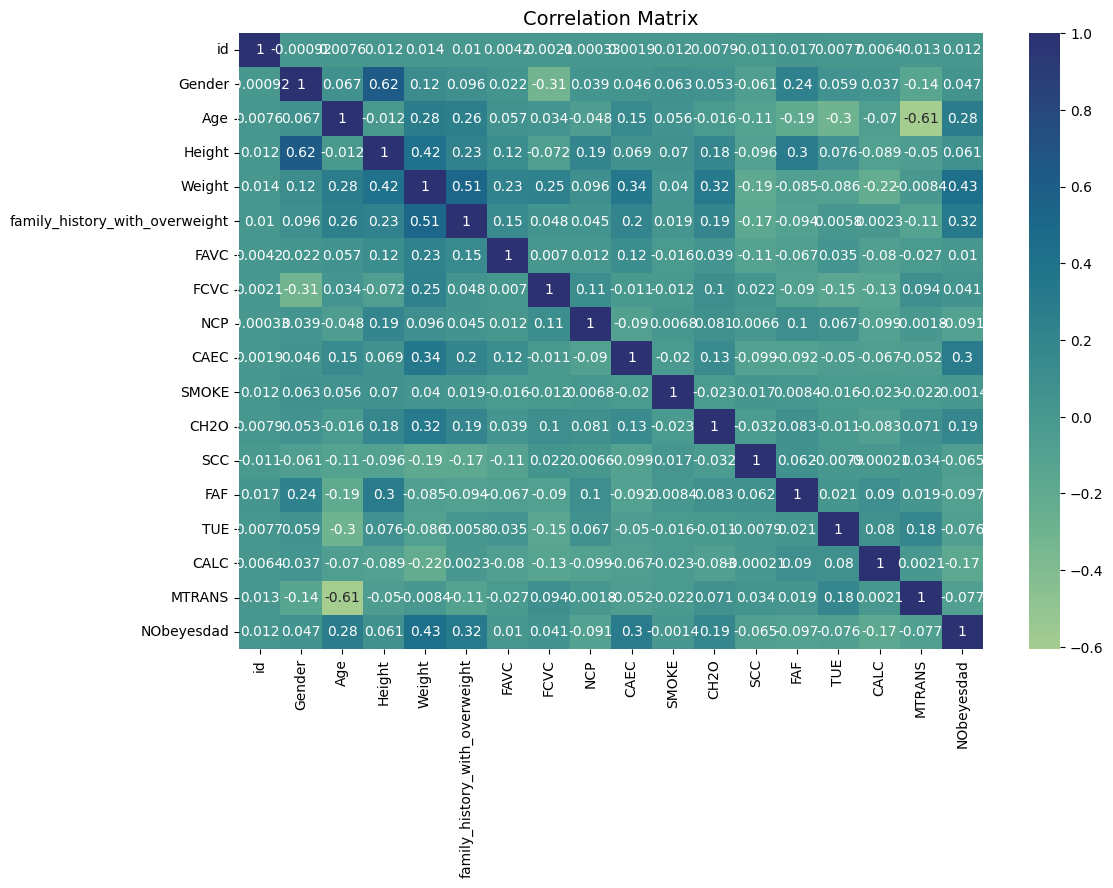

In [25]:
corr = t_df.corr()
plt.figure(figsize=(12, 8))
plt.rcParams['figure.facecolor'] = 'lightgrey'
s=sns.heatmap(corr,annot=True, cmap='crest')
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# Data Preprocessing

In [26]:

X = train.drop(['NObeyesdad'], axis=1)
y = train['NObeyesdad']


y = labelencoder.fit_transform(y)

In [27]:

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = StandardScaler()


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Building the model

In [29]:
lgbm_params = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.030962211546832760,
    'n_estimators': 550,
    'lambda_l1': 0.009667446568254372,
    'lambda_l2': 0.04018641437301800,
    'max_depth': 20,
    'colsample_bytree': 0.40977129346872643,
    'subsample': 0.9535797422450176,
    'min_child_samples': 26,   
    'class_weight':'balanced'
}

classifiers = {
    'LightGBM': LGBMClassifier(**lgbm_params,
                               force_col_wise=True,  
                               verbose=-1),
    'CatBoost': CatBoostClassifier(eval_metric='Accuracy',
                                   random_seed=56,    
                                   iterations=2000,
                                   verbose=False),
    'XGBoost': XGBClassifier(learning_rate=0.01, 
                             n_estimators=5000, 
                             random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=700,
                                                    random_state=77,
                                                    criterion='entropy',    
                                                    max_depth=20,
                                                    class_weight='balanced'),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
}
performance_list = []

Training models: 100%|██████████| 9/9 [05:29<00:00, 36.63s/model]


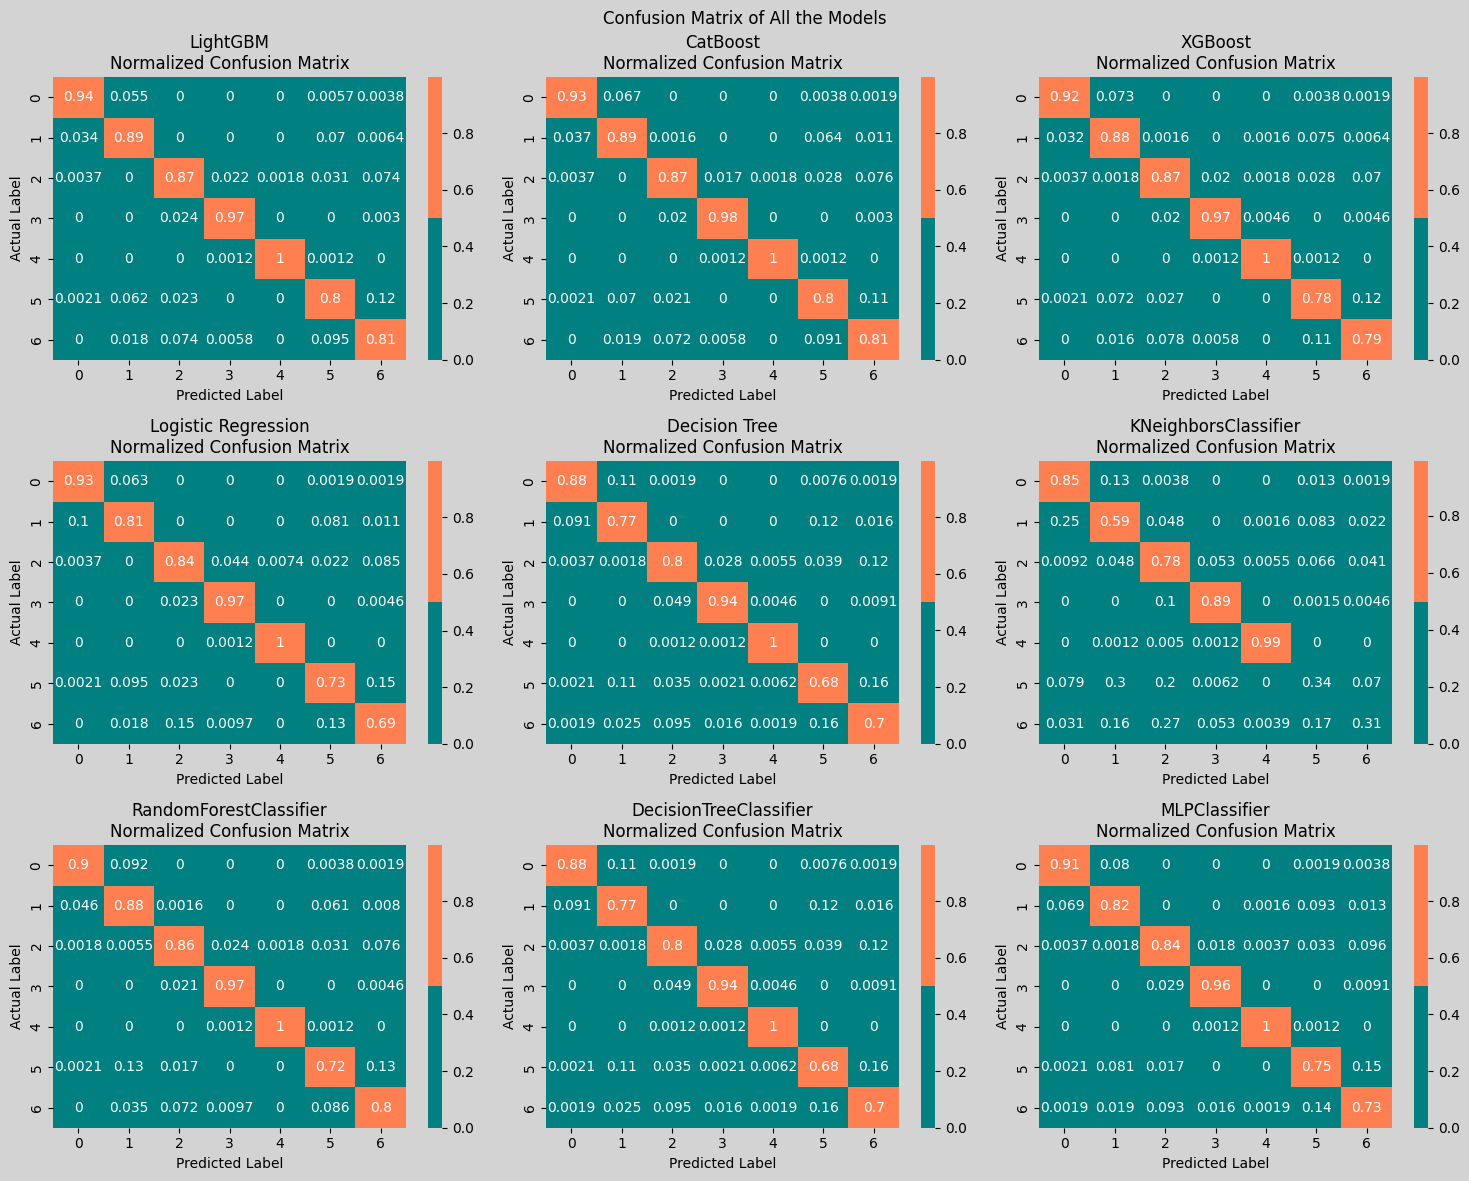

In [30]:
# Train and evaluate models
num_rows = 3
num_columns = ceil(len(classifiers) / num_rows)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 12))

# Train and evaluate models
for name, classifier in tqdm(classifiers.items(), desc='Training models', unit='model'):
    model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    model.fit(X_train, y_train)

    test_predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, test_predictions)
    conf_matrix = confusion_matrix(y_test, test_predictions, normalize='true')
    classification_rep = classification_report(y_test, test_predictions)

    performance_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': classification_rep
    })
    
    # Plot the confusion matrix
    idx = list(classifiers.keys()).index(name)
    row_idx = idx // num_columns
    col_idx = idx % num_columns

    
    sns.heatmap(conf_matrix, annot=True, cmap=['teal', 'coral'], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'{name}\nNormalized Confusion Matrix')
    axes[row_idx, col_idx].set_xlabel('Predicted Label')
    axes[row_idx, col_idx].set_ylabel('Actual Label')

for i in range(len(classifiers), num_rows * num_columns):
    row_idx = i // num_columns
    col_idx = i % num_columns
    fig.delaxes(axes[row_idx, col_idx])
plt.suptitle('Confusion Matrix of All the Models')
plt.tight_layout()
plt.show()


# Evaluating the model

In [31]:
performance_df = pd.DataFrame(performance_list)
performance_df['Rank'] = performance_df['Accuracy'].rank(ascending=False, method='first').astype(int)
performance_df = performance_df.sort_values(by='Rank')
best_model_performance = performance_df.iloc[0]['Model']

performance_df[['Model', 'Accuracy', 'Rank']].style.background_gradient(cmap='viridis')

In [32]:
best_model = classifiers[best_model_performance]
best_model

In [33]:
# Train the best model on the entire training dataset
final_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', best_model)])
final_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x78ad018ce950>)])

# Submit the prediction

In [34]:
test_prediction = final_model.predict(test)

In [35]:
sample_submission["NObeyesdad"] = test_prediction

In [36]:

original_labels = labelencoder.classes_
print("Original class labels:", original_labels)


encoded_labels = labelencoder.transform(original_labels)
print("Encoded labels:", encoded_labels)

Original class labels: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']
Encoded labels: [0 1 2 3 4 5 6]


In [37]:
# Mapping dictionary for label conversion
label_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

sample_submission['NObeyesdad'] = sample_submission['NObeyesdad'].map(label_mapping)

In [38]:
sample_submission

id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594        Normal_Weight
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]

In [39]:
sample_submission.to_csv("submission.csv", index=False)